In [1]:
from sqlalchemy import create_engine, MetaData
import pandas as pd
# from geoalchemy2 import Geometry
import settings

config = settings.DevelopmentConfig()
engine = create_engine(config.DATABASE_URI) 
meta = MetaData()
taxi_df = pd.read_sql_query('SELECT * FROM tripdata where random() < 0.001', engine)
hackfare_df = pd.read_sql_query('SELECT * FROM hack_fare_all where trips > 100 order by avg_total', engine)
uber_df = pd.read_sql_query('SELECT * FROM uber_trip WHERE random() < 0.001', engine)
weather_df = pd.read_sql_query('SELECT * FROM nyweather', engine)

In [2]:
print taxi_df.columns
print uber_df.columns
print hackfare_df.columns
print weather_df.columns

Index([           u'trip_id',          u'medallion',       u'hack_license',
                u'vendor_id',          u'rate_code', u'store_and_fwd_flag',
          u'pickup_datetime',   u'dropoff_datetime',    u'passenger_count',
            u'trip_distance',   u'pickup_longitude',    u'pickup_latitude',
        u'dropoff_longitude',   u'dropoff_latitude',       u'payment_type',
              u'fare_amount',          u'surcharge',            u'mta_tax',
               u'tip_amount',       u'tolls_amount',       u'total_amount',
              u'geom_pickup',       u'geom_dropoff'],
      dtype='object')
Index([u'record_id', u'datetime', u'latitude', u'longitude', u'base'], dtype='object')
Index([   u'record_id', u'hack_license',        u'trips',     u'avg_fare',
            u'avg_tip',    u'avg_total',    u'sum_total'],
      dtype='object')
Index([       u'record_id',         u'datetime',       u'visibility',
            u'weathertype',   u'drybulbcelsius', u'relativehumidity',
         

In [3]:
%matplotlib inline  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [4]:
taxi_df['year'] = taxi_df.pickup_datetime.dt.year
taxi_df['month'] = taxi_df.pickup_datetime.dt.month
taxi_df['day'] = taxi_df.pickup_datetime.dt.day
taxi_df['weekday'] = taxi_df.pickup_datetime.dt.weekday
taxi_df['hour'] = taxi_df.pickup_datetime.dt.hour



In [5]:
taxi_df.describe()

,trip_id,medallion,hack_license,rate_code,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,year,month,day,weekday,hour
count,3354.000000,3.354000e+03,3.354000e+03,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,...,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000
mean,1663742.796661,2.013492e+09,2.013497e+09,1.032499,1.712582,2.889374,-73.976730,40.751159,-73.974936,40.750840,...,0.318277,0.497466,1.367001,0.245903,14.936547,2013.488670,6.460644,15.489267,3.056649,13.497018
std,957316.841958,4.968193e+05,4.917627e+05,0.267238,1.359476,3.283105,0.033070,0.026778,0.037291,0.031123,...,0.358315,0.035512,2.172469,1.253045,12.390496,0.499946,3.509236,8.774372,1.972313,6.594751
min,81.000000,2.013000e+09,2.013000e+09,1.000000,1.000000,0.000000,-74.347633,40.549942,-74.351974,40.548416,...,0.000000,0.000000,0.000000,0.000000,3.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,855673.750000,2.013006e+09,2.013015e+09,1.000000,1.000000,1.100000,-73.993024,40.735123,-73.991791,40.734715,...,0.000000,0.500000,0.000000,0.000000,8.000000,2013.000000,3.000000,8.000000,1.000000,9.000000
50%,1665166.000000,2.013013e+09,2.013039e+09,1.000000,1.000000,1.800000,-73.982674,40.752882,-73.980948,40.752987,...,0.000000,0.500000,1.000000,0.000000,11.300000,2013.000000,6.000000,16.000000,3.000000,14.000000
75%,2494029.500000,2.014000e+09,2.014000e+09,1.000000,2.000000,3.300000,-73.968644,40.767609,-73.965634,40.768219,...,0.500000,0.500000,2.000000,0.000000,17.000000,2014.000000,10.000000,23.000000,5.000000,19.000000
max,3314570.000000,2.014000e+09,2.014000e+09,5.000000,6.000000,32.600000,-73.751991,40.983334,-73.422028,40.942191,...,1.000000,0.500000,44.000000,15.990000,178.800000,2014.000000,12.000000,31.000000,6.000000,23.000000


[(0, 5)]

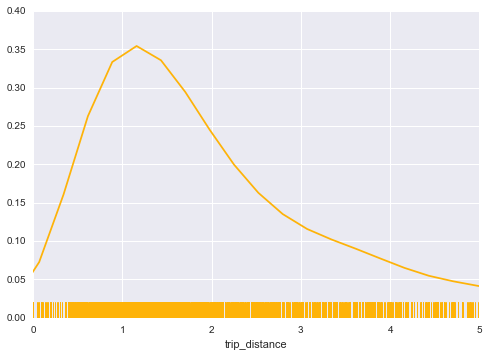

In [28]:
taxi_color=sns.xkcd_rgb["amber"]
uber_color=sns.xkcd_rgb["midnight"]
g = sns.distplot(taxi_df.trip_distance, hist=False, kde=True, rug=True, color=taxi_color);
g.set(xlim=(0,5))

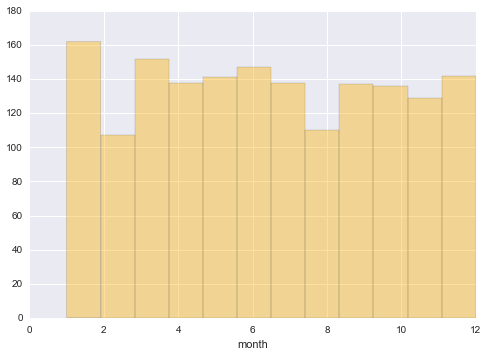

In [26]:
sns.distplot(taxi_df[taxi_df.year==2014].month, bins=12, kde=False, rug=False, color=taxi_color);

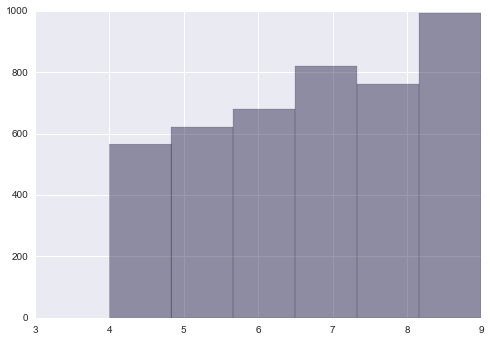

In [29]:
sns.distplot(uber_df['datetime'].dt.month, bins=6, kde=False, rug=False, color=uber_color);

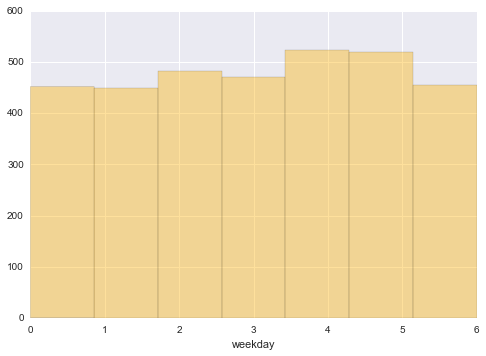

In [30]:
sns.distplot(taxi_df.weekday, bins=7, kde=False, rug=False, color=taxi_color);

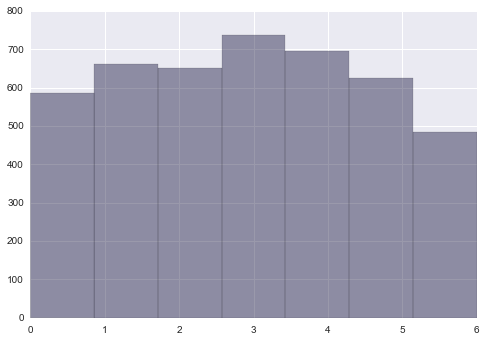

In [31]:
sns.distplot(uber_df.datetime.dt.weekday, bins=7, kde=False, rug=False, color=uber_color);

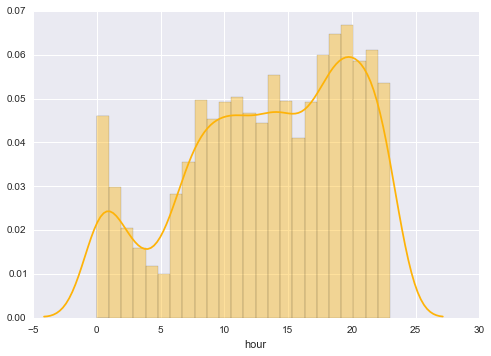

In [33]:
sns.distplot(taxi_df.hour, bins=24, kde=True, rug=False, color=taxi_color);

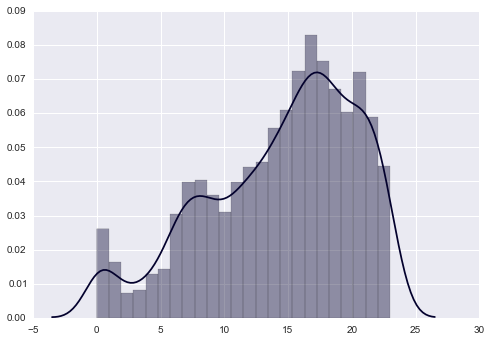

In [34]:
sns.distplot(uber_df.datetime.dt.hour, bins=24, kde=True, rug=False, color=uber_color);

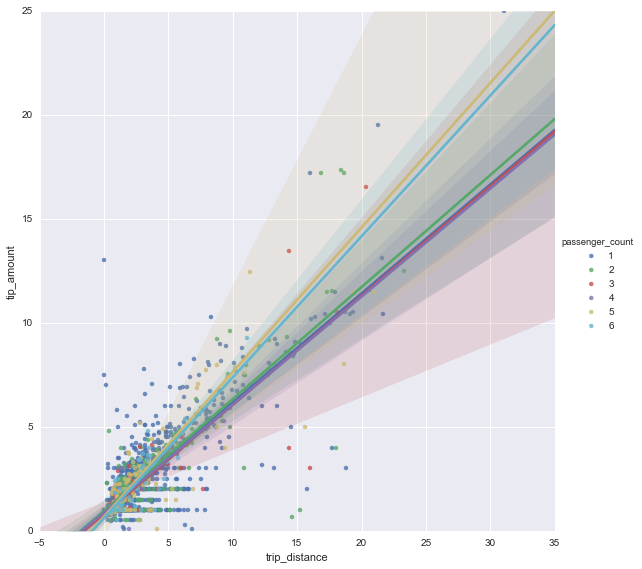

In [35]:
g = sns.lmplot(x="trip_distance", y="tip_amount", hue='passenger_count', hue_order=[1,2,3,4,5,6], data=taxi_df[taxi_df.tip_amount>0], size=8);
g.set(ylim=(0, 25))

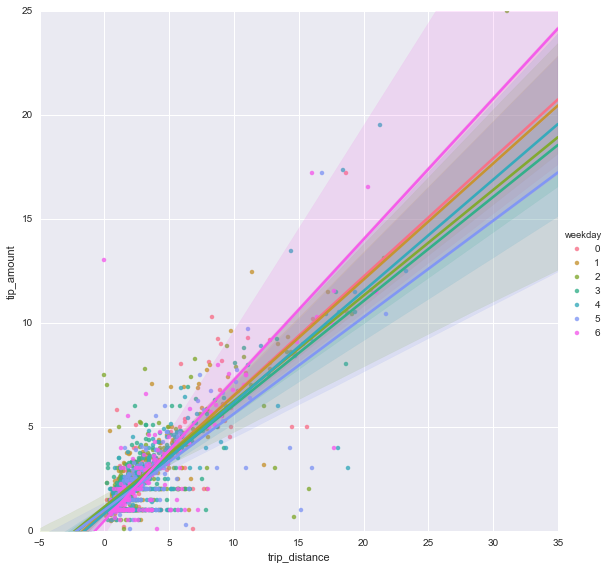

In [40]:
g = sns.lmplot(x="trip_distance", y="tip_amount", hue='weekday', hue_order=[0,1,2,3,4,5,6], data=taxi_df[taxi_df.tip_amount>0], size=8);
g.set(ylim=(0,25))

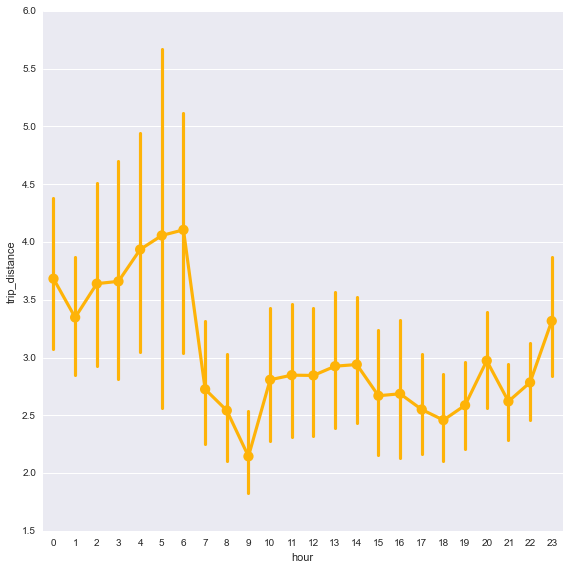

In [41]:
g = sns.factorplot(x="hour", y="trip_distance", order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], data=taxi_df, size=8, color=taxi_color)

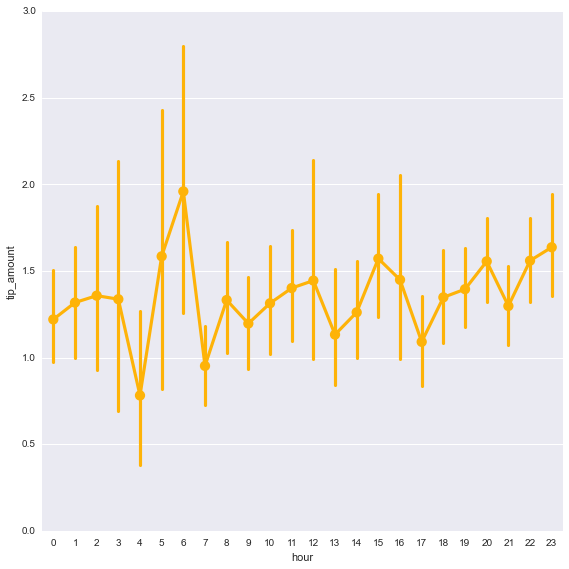

In [43]:
g = sns.factorplot(x="hour", y="tip_amount", order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], data=taxi_df, size=8, color=taxi_color)

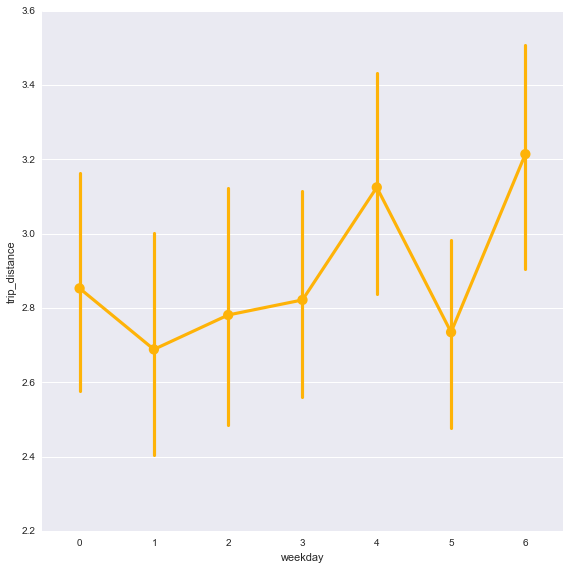

In [44]:
g = sns.factorplot(x="weekday", y="trip_distance", order=[0,1,2,3,4,5,6], data=taxi_df, size=8, color=taxi_color)

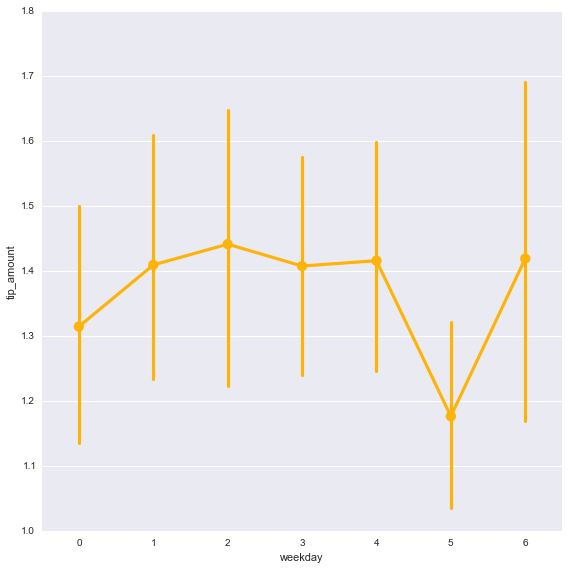

In [45]:
g = sns.factorplot(x="weekday", y="tip_amount", order=[0,1,2,3,4,5,6], data=taxi_df, size=8, color=taxi_color)

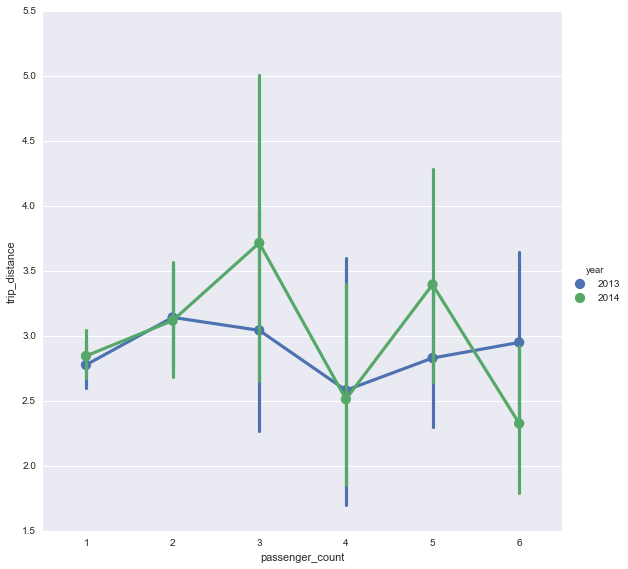

In [46]:
g = sns.factorplot(x="passenger_count", y="trip_distance", order=[1,2,3,4,5,6], hue='year', data=taxi_df, size=8)

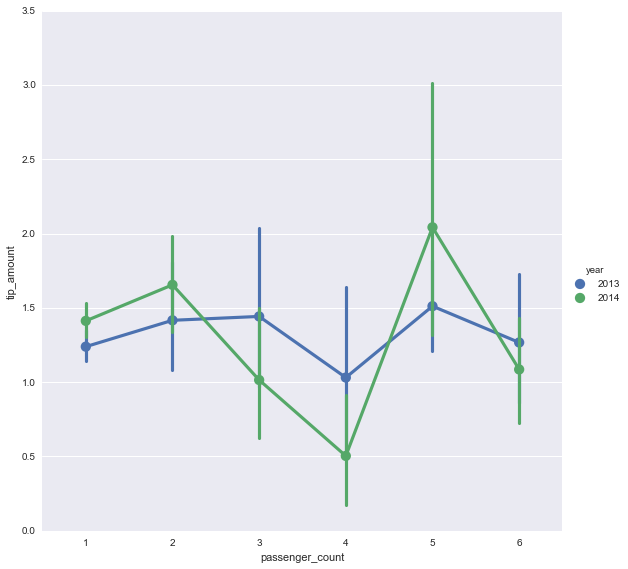

In [47]:
g = sns.factorplot(x="passenger_count", y="tip_amount", order=[1,2,3,4,5,6], hue='year', data=taxi_df, size=8)

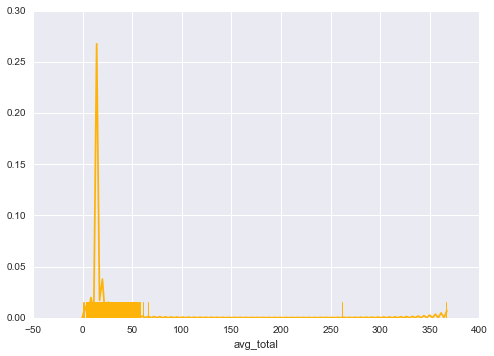

In [ ]:
g = sns.distplot(hackfare_df[hackfare_df.trips>100].avg_total, hist=False, kde=True, rug=True, color=taxi_color);

